# TTDS: Machine Learning project 

# Testing Algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:/DataSets/diabetes.csv")

In [3]:
data

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Dataset Extension

In [4]:
# Generate synthetic data by doubling the 'label' values
data_synthetic = data.copy()

# Concatenate the original and synthetic DataFrames
df = pd.concat([data, data_synthetic], ignore_index=True)

# Display the extended DataFrame
df

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,1536.0,3.845052,3.368480,0.000,1.00000,3.0000,6.00000,17.00
glucose,1536.0,120.894531,31.962202,0.000,99.00000,117.0000,140.25000,199.00
bp_diastolic,1536.0,69.105469,19.349501,0.000,62.00000,72.0000,80.00000,122.00
skin_triceps,1536.0,20.536458,15.947021,0.000,0.00000,23.0000,32.00000,99.00
insulin,1536.0,79.799479,115.206457,0.000,0.00000,30.5000,127.25000,846.00
bmi,1536.0,31.992578,7.881592,0.000,27.30000,32.0000,36.60000,67.10
pedigree,1536.0,0.471876,0.331221,0.078,0.24375,0.3725,0.62625,2.42
age,1536.0,33.240885,11.756400,21.000,24.00000,29.0000,41.00000,81.00
label,1536.0,0.348958,0.476796,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#check label value count 
df.label.value_counts()

0    1000
1     536
Name: label, dtype: int64

# Outliers Analysis

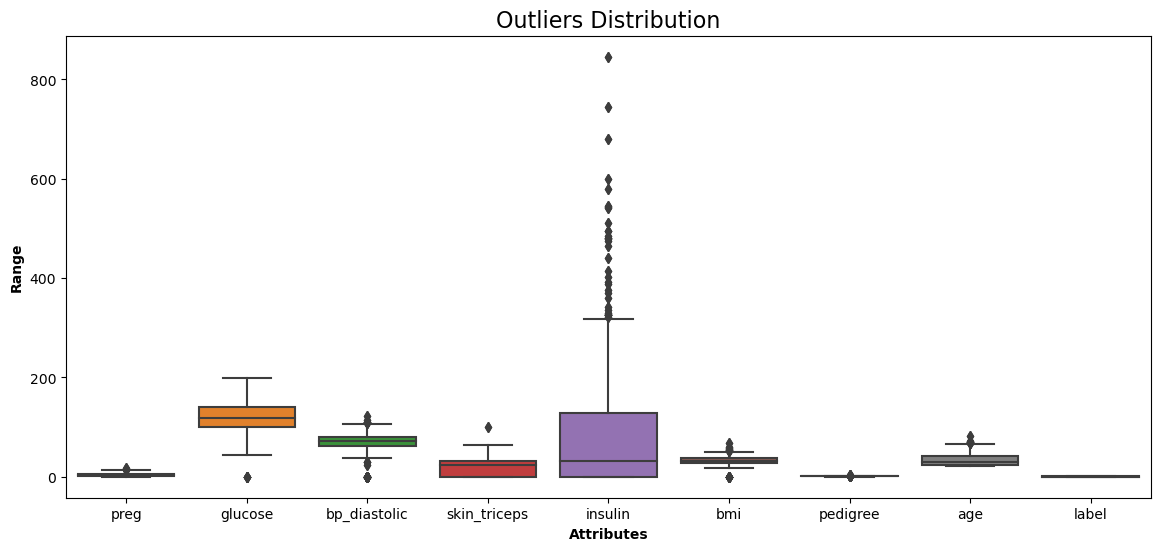

In [7]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
show_boxplot(df)

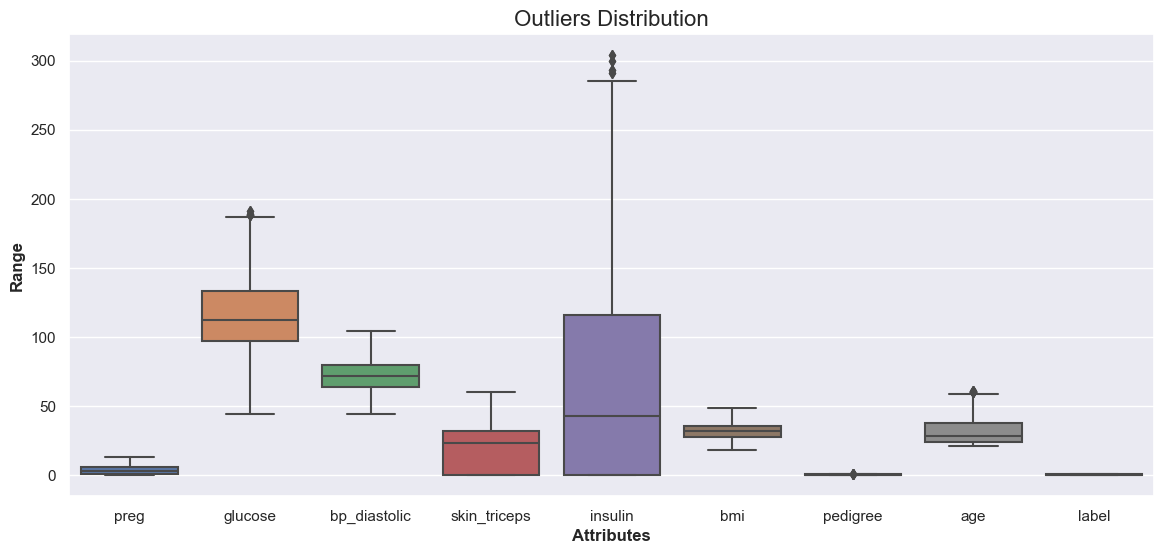

In [32]:
#Function 1st time
def remove_outliers(data):
   
    df = data.copy()

    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.25)
        Q3 = df[str(col)].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bounds to filter outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]

    return df
without_outliers = remove_outliers(df)
show_boxplot(without_outliers)

NOTE: Outliers completely removed, after function has been run two to three times. 

In [33]:
df=without_outliers

In [34]:
df

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
1530,9,89,62,0,0,22.5,0.142,33,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1


In [35]:
df["age"].describe().T

count    1186.000000
mean       31.691400
std        10.006118
min        21.000000
25%        24.000000
50%        28.000000
75%        38.000000
max        61.000000
Name: age, dtype: float64

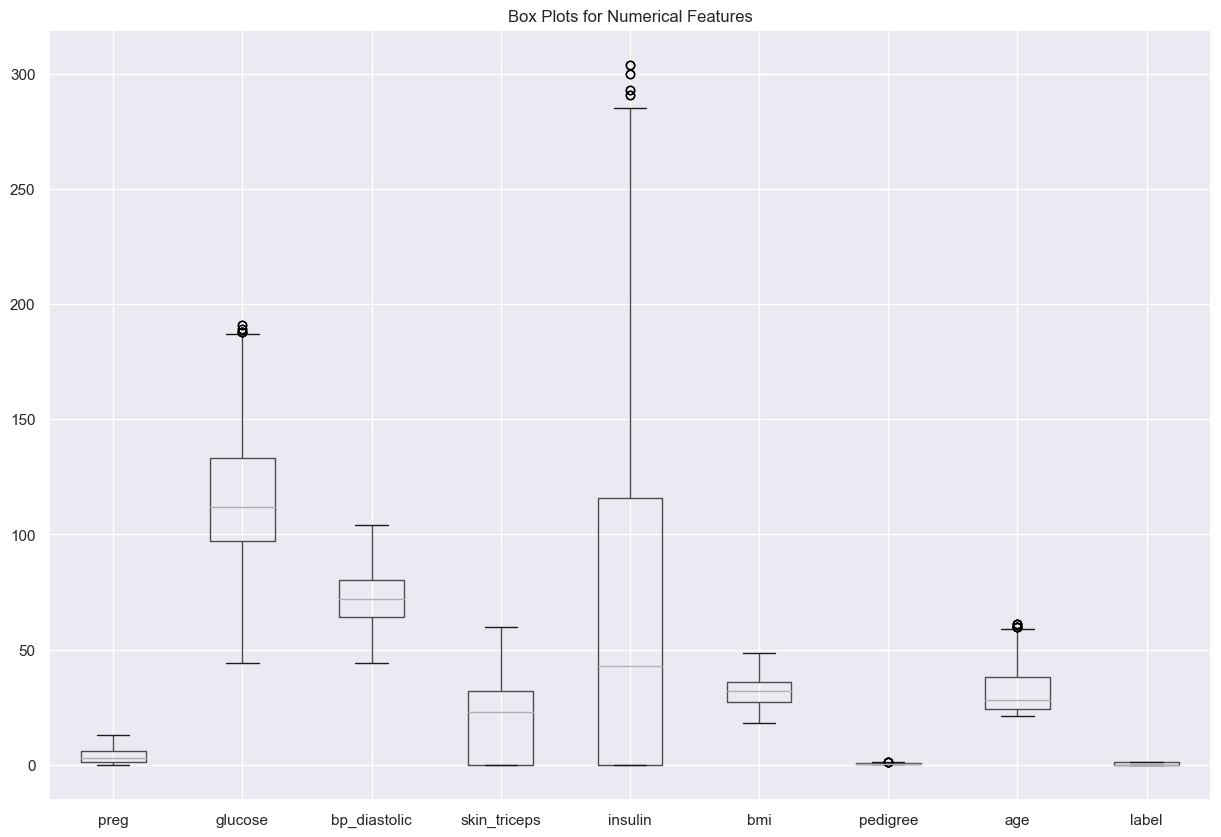

In [36]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots for Numerical Features')
plt.show()

# HeatMap

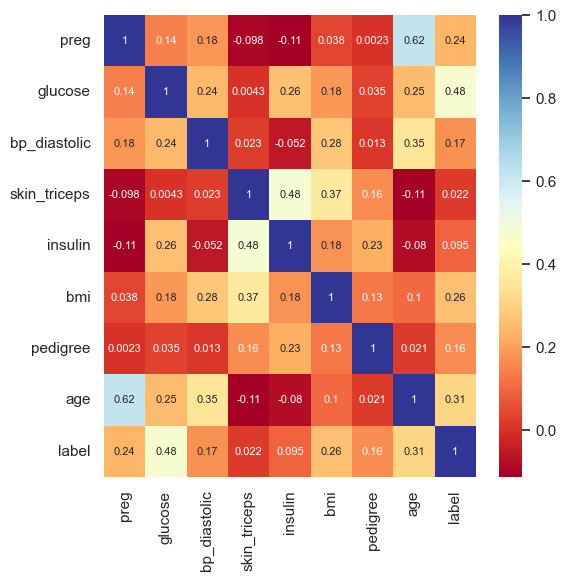

In [37]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu", annot_kws={"fontsize": 8});

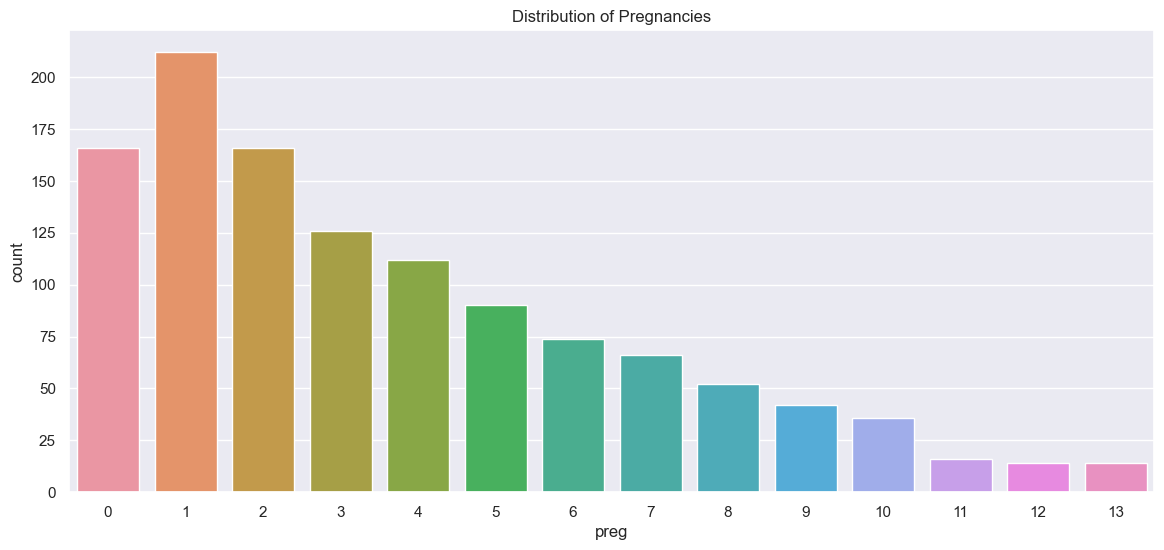

In [38]:
# Distribution of categorical features
sns.countplot(x='preg', data=df)
plt.title('Distribution of Pregnancies')
plt.show()

In [39]:
cols=list(df.columns)
print(cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [40]:
df["preg"].value_counts()

1     212
0     166
2     166
3     126
4     112
5      90
6      74
7      66
8      52
9      42
10     36
11     16
13     14
12     14
Name: preg, dtype: int64

In [41]:
feature_cols=cols[0:8]
print(feature_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


In [42]:
feature_cols=['preg', 'glucose', 'bp_diastolic','skin_triceps', 'insulin','bmi', 'pedigree', 'age']
print(feature_cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age']


# MinMax Scalar

In [43]:
df.dtypes

preg              int64
glucose           int64
bp_diastolic      int64
skin_triceps      int64
insulin           int64
bmi             float64
pedigree        float64
age               int64
label             int64
dtype: object

# Data Train-Test split

In [44]:
#Library Call for data split in two portion Train and Test: 
from sklearn.model_selection import train_test_split

In [56]:
#dataframe
x=df[feature_cols]  #feature
#series
y=df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state=30)

In [57]:
#Total size of the Training dataset:
print("[XY_Train] dataset Shape:", x_train.shape)

#Total size of the Testing dataset:
print("[XY_Test] dataset Shape:", x_test.shape)

[XY_Train] dataset Shape: (889, 8)
[XY_Test] dataset Shape: (297, 8)


# Decision Tree Lib Call

In [58]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dpth=4
clf_D = DecisionTreeClassifier(criterion="entropy", max_depth=dpth)
# Train Classifer
model_D = clf_D.fit(x_train, y_train)
y_pred = clf_D.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted": y_pred})
y.head()

,Origional,Predicted
274,0,0
72,1,0
808,0,0
1061,1,0
378,1,1


# Confusion Matrics of Decision Tree

Confusion Matrix:
[[194   9]
 [ 56  38]]


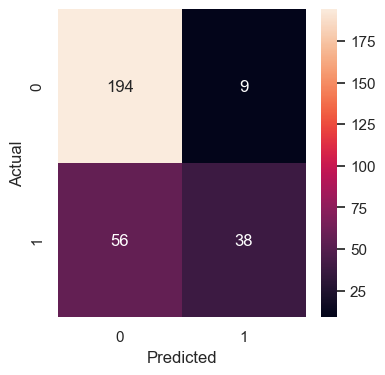

In [59]:
# calculate accuracy
from sklearn import metrics

result_D = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result_D)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_D = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_D, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation of Decision Tree

In [60]:
#[row, column]
#(Actual, Predict)
TP = result_D[1, 1]      
TN = result_D[0, 0]
FP = result_D[0, 1]
FN = result_D[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_D)

Metrics computed from a confusion matrix
Accuracy:	 0.7811447811447811
Sensitivity:	 0.40425531914893614
Specificity:	 0.9556650246305419
Precision:	 0.8085106382978723
Classification Eerror: 0.21885521885521886
False_Positive_Rate: 0.044334975369458074
###########################################


# Random Forest Lib Call

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf_R=RandomForestClassifier(n_estimators=3)
# Train Classifer
model_R = clf_R.fit(x_train, y_train)
y_pred = clf_R.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted": y_pred})
y.head()

,Origional,Predicted
274,0,0
72,1,1
808,0,0
1061,1,0
378,1,1


# Confusion Matrics of Random Forest

Confusion Matrix:
[[197   6]
 [ 23  71]]


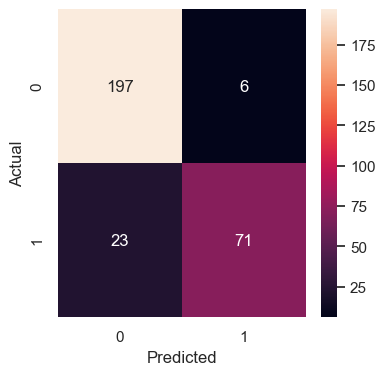

In [62]:
# calculate accuracy
from sklearn import metrics

result_R = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result_R)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_R = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_R, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation of Random Forest

In [63]:
#[row, column]
#(Actual, Predict)
TP = result_R[1, 1]      
TN = result_R[0, 0]
FP = result_R[0, 1]
FN = result_R[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_R)

Metrics computed from a confusion matrix
Accuracy:	 0.9023569023569024
Sensitivity:	 0.7553191489361702
Specificity:	 0.9704433497536946
Precision:	 0.922077922077922
Classification Eerror: 0.09764309764309764
False_Positive_Rate: 0.029556650246305383
###########################################


# KNeighbour Library call

In [64]:
from sklearn.neighbors import KNeighborsClassifier
clf_N= KNeighborsClassifier(n_neighbors=3)
# Train Classifer
model_N = clf_N.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf_N.predict(x_test)
y=pd.DataFrame({"Origional": y_test, "Predicted": y_pred})
y.head()

,Origional,Predicted
274,0,0
72,1,0
808,0,0
1061,1,0
378,1,1


# Confusion Matrics of KNN

Confusion Matrix:
[[165  38]
 [ 43  51]]


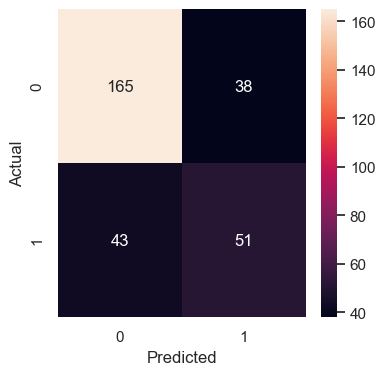

In [65]:
# calculate accuracy
from sklearn import metrics

result_N = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result_N)

def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx_N = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx_N, annot=True, fmt = '.3g')

plt1()

# Accuracy Calculation of KNN

In [66]:
#[row, column]
#(Actual, Predict)
TP = result_N[1, 1]      
TN = result_N[0, 0]
FP = result_N[0, 1]
FN = result_N[1, 0]

def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')
EvClsMdl(result_N)

Metrics computed from a confusion matrix
Accuracy:	 0.7272727272727273
Sensitivity:	 0.5425531914893617
Specificity:	 0.812807881773399
Precision:	 0.5730337078651685
Classification Eerror: 0.2727272727272727
False_Positive_Rate: 0.18719211822660098
###########################################
